In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

dataURL = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
dfRaw = pd.read_csv(dataURL)

In [ ]:
dfRaw.shape

(7214, 53)

In [ ]:
dfFiltered = (dfRaw[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 
             'sex', 'priors_count', 'days_b_screening_arrest', 'decile_score', 
             'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']]
             .loc[(dfRaw['days_b_screening_arrest'] <= 45) & (dfRaw['days_b_screening_arrest'] >= -45), :]
             )
print('Number of rows: {}'.format(len(dfFiltered.index)))

dfFiltered = dfFiltered.dropna()

Number of rows: 6336


In [ ]:
dfFiltered_race = (dfRaw[['age', 'c_charge_degree', 'age_cat', 'score_text', 
             'sex', 'priors_count', 'days_b_screening_arrest', 'decile_score', 
             'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']]
             .loc[(dfRaw['days_b_screening_arrest'] <= 30) & (dfRaw['days_b_screening_arrest'] >= -30), :]
             .loc[dfRaw['is_recid'] != -1, :]
             .loc[dfRaw['c_charge_degree'] != 'O', :]
             .loc[dfRaw['score_text'] != 'N/A', :]
             )
print('Number of rows: {}'.format(len(dfFiltered.index)))

Number of rows: 6336


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
catCols = ['score_text','age_cat','sex','c_charge_degree']
dfFiltered_race.loc[:,catCols] = dfFiltered_race.loc[:,catCols].astype('category')

# dfDummies = pd.get_dummies(data = dfFiltered.loc[dfFiltered['score_text'] != 'Low',:], columns=catCols)
dfDummies_race = pd.get_dummies(data = dfFiltered_race, columns=catCols)

# Clean column names
new_column_names = [col.lstrip().rstrip().lower().replace(" ", "_").replace("-", "_") for col in dfDummies_race.columns]
dfDummies_race.columns = new_column_names

# We want another variable that combines Medium and High
dfDummies_race['score_text_medhi'] = dfDummies_race['score_text_medium'] + dfDummies_race['score_text_high']

In [ ]:
# dfFiltered2 = (dfRaw[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 
#              'sex', 'priors_count', 'days_b_screening_arrest', 'decile_score', 
#              'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']]
#              )

In [ ]:
# dfFiltered2 = dfFiltered2.dropna()

In [ ]:
# import statsmodels.api as sm
# from statsmodels.formula.api import logit
# catCols = ['score_text','age_cat','sex','race','c_charge_degree']
# dfFiltered2.loc[:,catCols] = dfFiltered2.loc[:,catCols].astype('category')

# # dfDummies = pd.get_dummies(data = dfFiltered.loc[dfFiltered['score_text'] != 'Low',:], columns=catCols)
# dfDummies2 = pd.get_dummies(data = dfFiltered2, columns=catCols)

# # Clean column names
# new_column_names = [col.lstrip().rstrip().lower().replace(" ", "_").replace("-", "_") for col in dfDummies2.columns]
# dfDummies2.columns = new_column_names

# # We want another variable that combines Medium and High
# dfDummies2['score_text_medhi'] = dfDummies2['score_text_medium'] + dfDummies2['score_text_high']

In [ ]:
# dfFiltered2

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,23,F,African-American,Less than 25,Medium,Male,0,-1.0,7,0,0,2013-11-22 05:18:27,2013-11-24 02:59:20
7210,23,F,African-American,Less than 25,Low,Male,0,-1.0,3,0,0,2014-01-31 07:13:54,2014-02-02 04:03:52
7211,57,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2014-01-13 05:48:01,2014-01-14 07:49:46
7212,33,M,African-American,25 - 45,Low,Female,3,-1.0,2,0,0,2014-03-08 08:06:02,2014-03-09 12:18:04


In [ ]:
pd.crosstab(dfFiltered['score_text'],dfFiltered['race'])


race,African-American,Asian,Caucasian,Hispanic,Native American,Other
score_text,,,,,,
High,845,3,223,47,4,22
Low,1346,24,1407,368,3,273
Medium,984,4,473,94,4,48


In [ ]:
pd.crosstab(dfFiltered['score_text'],dfFiltered['decile_score'])


decile_score,1,2,3,4,5,6,7,8,9,10
score_text,,,,,,,,,,
High,0,0,0,0,0,0,0,420,420,304
Low,1286,822,647,666,0,0,0,0,0,0
Medium,0,0,0,0,582,529,496,0,0,0


Text(376.77500000000003, 0.5, 'Count')

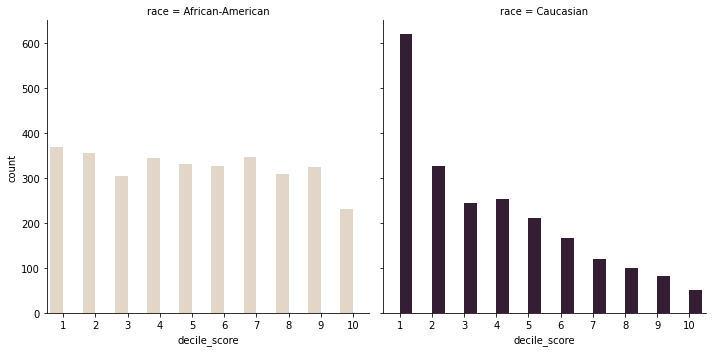

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("ch:s=.60,rot=0.25", as_cmap=True)

sns.catplot(x='decile_score',palette='ch:.25',col="race", kind='count', hue='race', data=dfFiltered.loc[
                (dfFiltered['race'] == 'African-American') | (dfFiltered['race'] == 'Caucasian'),:
            ])



plt.ylabel('Count')


Text(376.77500000000003, 0.5, 'Count')

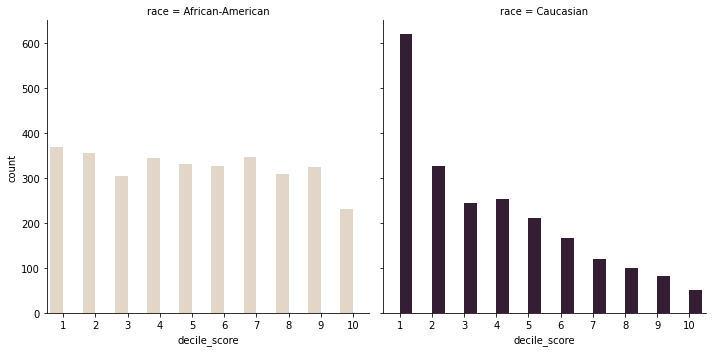

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("ch:s=.60,rot=0.25", as_cmap=True)

sns.catplot(x='decile_score',palette='ch:.25',col="race", kind='count', hue='race', data=dfFiltered.loc[
                (dfFiltered['race'] == 'African-American') | (dfFiltered['race'] == 'Caucasian'),:
            ])



plt.ylabel('Count')

Text(40.153420138888876, 0.5, 'Count')

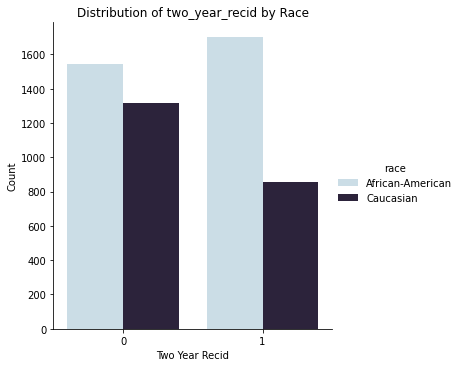

In [ ]:
from numpy.ma.core import count
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.catplot(x='two_year_recid',palette='ch:s=.25,rot=-.25',kind = 'count', hue='race', data=dfFiltered.loc[
                (dfFiltered['race'] == 'African-American') | (dfFiltered['race'] == 'Caucasian'),:
            ])

plt.title("Distribution of two_year_recid by Race")
plt.xlabel('Two Year Recid')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


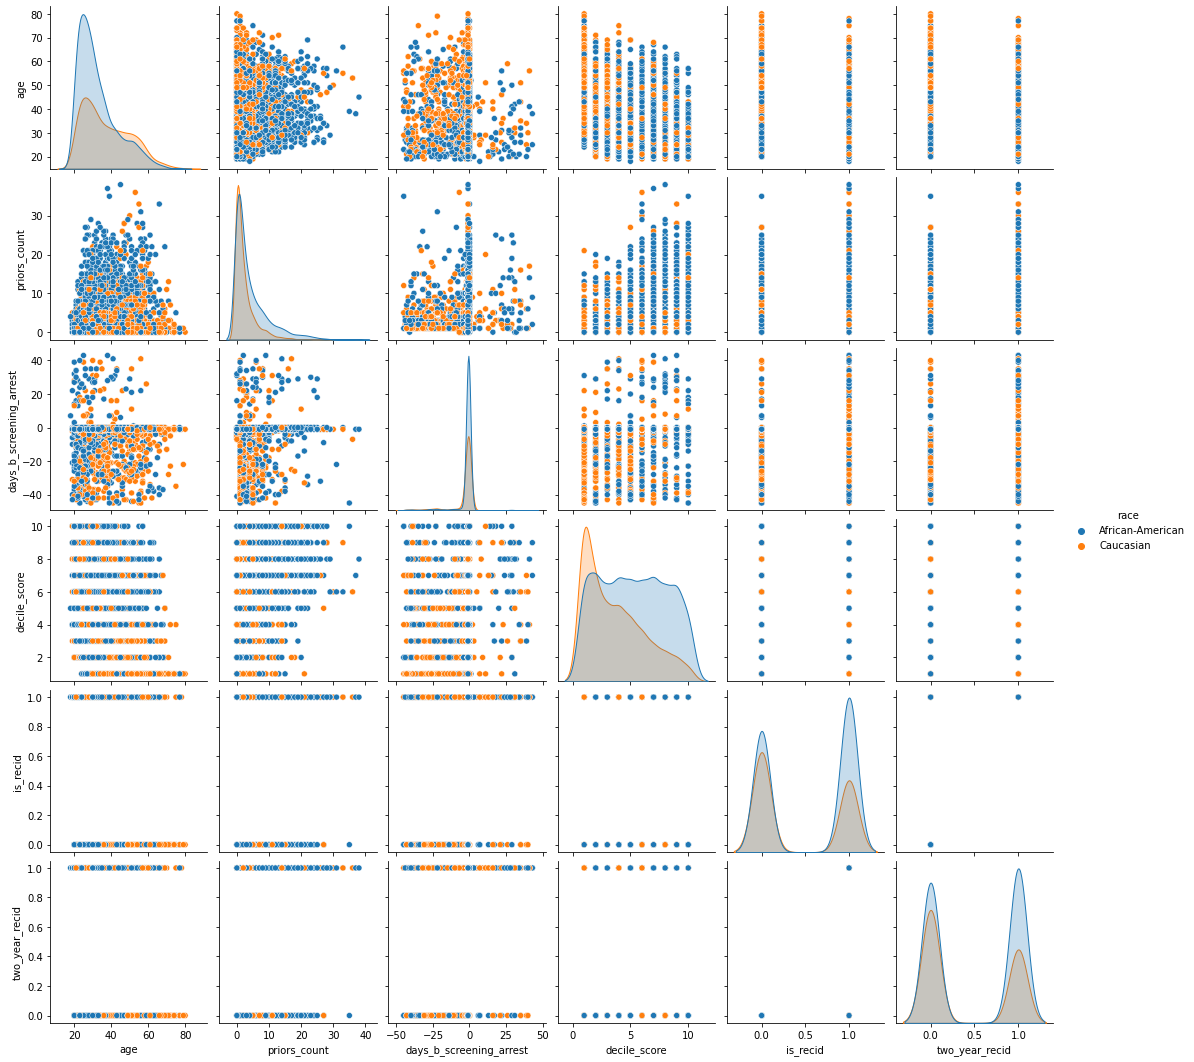

In [ ]:
sns.pairplot(data=dfFiltered.loc[
                (dfFiltered['race'] == 'African-American') | (dfFiltered['race'] == 'Caucasian'),:
            ], hue='race', size=2.5);

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit
catCols = ['score_text','age_cat','sex','race','c_charge_degree']
dfFiltered.loc[:,catCols] = dfFiltered.loc[:,catCols].astype('category')

# dfDummies = pd.get_dummies(data = dfFiltered.loc[dfFiltered['score_text'] != 'Low',:], columns=catCols)
dfDummies = pd.get_dummies(data = dfFiltered, columns=catCols)

# Clean column names
new_column_names = [col.lstrip().rstrip().lower().replace(" ", "_").replace("-", "_") for col in dfDummies.columns]
dfDummies.columns = new_column_names

# We want another variable that combines Medium and High
dfDummies['score_text_medhi'] = dfDummies['score_text_medium'] + dfDummies['score_text_high']

In [ ]:
# R-style specification
formula = 'two_year_recid ~ sex_female + age_cat_greater_than_45 + age_cat_less_than_25 + race_african_american + race_asian + race_hispanic + race_native_american + race_other + priors_count + c_charge_degree_m + score_text_medhi'

score_mod = logit(formula, data = dfDummies).fit()
print(score_mod.summary())


Optimization terminated successfully.
         Current function value: 0.603687
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         two_year_recid   No. Observations:                 6172
Model:                          Logit   Df Residuals:                     6160
Method:                           MLE   Df Model:                           11
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.1240
Time:                        02:08:56   Log-Likelihood:                -3726.0
converged:                       True   LL-Null:                       -4253.2
Covariance Type:            nonrobust   LLR p-value:                3.567e-219
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.7934      0.067    -11.778      0.000      -0.925   

In [ ]:
control = np.exp(-0.7934) / (1 + np.exp(-0.7934))
np.exp(-0.4566) / (1 - control + (control * np.exp(-0.4566)))

0.7150680370297372

In [ ]:
y= dfDummies.two_year_recid.values
x_data = dfDummies.drop(['two_year_recid'], axis = 1)

In [ ]:
pd.to_datetime(x_data.c_jail_out)
pd.to_datetime(x_data.c_jail_in)

0      2013-08-13 06:03:42
1      2013-01-26 03:45:27
2      2013-04-13 04:58:34
5      2013-11-30 04:50:18
6      2014-02-18 05:08:24
               ...        
7209   2013-11-22 05:18:27
7210   2014-01-31 07:13:54
7211   2014-01-13 05:48:01
7212   2014-03-08 08:06:02
7213   2014-06-28 12:16:41
Name: c_jail_in, Length: 6172, dtype: datetime64[ns]

In [ ]:

x_data["days_in_jail"] = (pd.to_datetime(x_data.c_jail_out) - pd.to_datetime(x_data.c_jail_in)).dt.days

In [ ]:
x_data = x_data.drop(['c_jail_out','c_jail_in'], axis = 1)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # transform data
# x = scaler.fit_transform(x_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.33)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print(x_train)
print(x_test)

                         279   6967  5151  1027  3578  6585  4295  4881  6658  \
age                      22.0  21.0  30.0  28.0  35.0  34.0  40.0  29.0  24.0   
priors_count              1.0   0.0   0.0   3.0   1.0   0.0   1.0  20.0   0.0   
days_b_screening_arrest  -1.0  -1.0   0.0   0.0   0.0  -1.0  -1.0  11.0  -1.0   
decile_score              3.0   5.0   1.0   3.0   2.0   2.0   4.0  10.0   9.0   
is_recid                  0.0   1.0   0.0   1.0   0.0   1.0   0.0   1.0   1.0   
score_text_high           0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
score_text_low            1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
score_text_medium         0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
age_cat_25___45           0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   
age_cat_greater_than_45   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
age_cat_less_than_25      1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
sex_female                1.

Test Accuracy 95.83%
[[1029   85]
 [   0  923]]
no of test (23, 2037)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1029, 85, 0, 923)

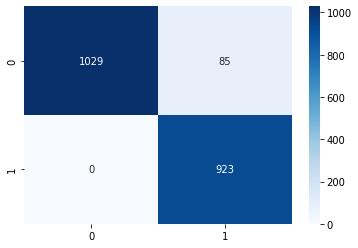

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
x_train = scaler.fit_transform(x_train)
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train.T,y_train.T)
y_pred = lr.predict(x_test.T)

print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap="Blues",fmt='d')
print("no of test",x_test.shape)
(tn, fp, fn, tp )

In [ ]:
x_whole_test = x_test.T

In [ ]:
x_whole_test['two_year_recid'] = y_test.T

In [ ]:
x_whole_test.race_african_american.values

array([1., 0., 1., ..., 0., 0., 1.])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test Accuracy 95.83%
[[1029   85]
 [   0  923]]
no of test (23, 2037)


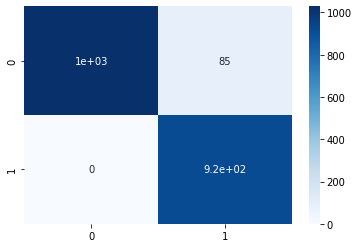

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
y_pred = lr.predict(x_test.T)

print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))
tn, fp, fn, tp = confusion_matrix(x_whole_test['two_year_recid'].T,y_pred).ravel()
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap="Blues")
print("no of test",x_test.shape)
(tn, fp, fn, tp )

from sklearn.metrics import det_curve


In [ ]:
x_whole_test_afr = x_whole_test.loc[x_whole_test['race_african_american'] != 0, :]



In [ ]:
x_whole_test_afr

,age,priors_count,days_b_screening_arrest,decile_score,is_recid,score_text_high,score_text_low,score_text_medium,age_cat_25___45,age_cat_greater_than_45,...,race_asian,race_caucasian,race_hispanic,race_native_american,race_other,c_charge_degree_f,c_charge_degree_m,score_text_medhi,days_in_jail,two_year_recid
5754,26.0,8.0,-1.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,1
5169,25.0,0.0,-1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
5187,20.0,5.0,-1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1
3936,23.0,0.0,-1.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1
1379,20.0,2.0,-1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,56.0,1.0,-1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1401,33.0,0.0,-4.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1
5900,55.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,0
4526,23.0,1.0,-1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,0


(1051,) udaa
(1051,) kumarr
Accuracy of african: 0.9495718363463368
[[452  53]
 [  0 546]]
no of test (1051, 23)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(452, 53, 0, 546)

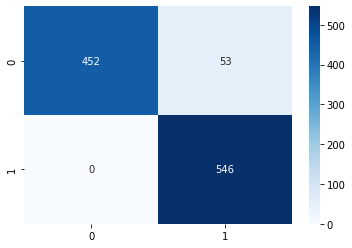

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
x_test_afr = x_whole_test_afr.drop(['two_year_recid'], axis = 1)
y_test_afr = x_whole_test_afr.two_year_recid
y_pred_af = lr.predict(x_test_afr)
print(y_test_afr.shape, "udaa")
print(y_pred_af.shape, "kumarr")
from sklearn.metrics import accuracy_score
print("Accuracy of african:",accuracy_score(y_test_afr.T, y_pred_af))
# print("Test Accuracy {:.2f}%".format(lr.score(y_test_afr.reshape(-1, 1),y_pred_af.reshape(-1, 1))*100))
tn, fp, fn, tp = confusion_matrix(y_test_afr,y_pred_af).ravel()
print(confusion_matrix(y_test_afr,y_pred_af))
sns.heatmap(confusion_matrix(y_test_afr,y_pred_af),annot=True, cmap="Blues",fmt='d')
print("no of test",x_test_afr.shape)
(tn, fp, fn, tp )

In [ ]:
x_whole_test_causian = x_whole_test.loc[x_whole_test['race_caucasian'] != 0, :]
x_whole_test_causian

,age,priors_count,days_b_screening_arrest,decile_score,is_recid,score_text_high,score_text_low,score_text_medium,age_cat_25___45,age_cat_greater_than_45,...,race_asian,race_caucasian,race_hispanic,race_native_american,race_other,c_charge_degree_f,c_charge_degree_m,score_text_medhi,days_in_jail,two_year_recid
3698,38.0,12.0,-1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1274,53.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0
6540,55.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
6154,38.0,5.0,-1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2170,40.0,0.0,-1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,33.0,0.0,-2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1279,37.0,1.0,-1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4864,28.0,0.0,-1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1998,25.0,4.0,-1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,183.0,0


(698,) udaa
(698,) kumarr
Accuracy: 0.9627507163323782
[[402  26]
 [  0 270]]
no of test (698, 23)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(402, 26, 0, 270)

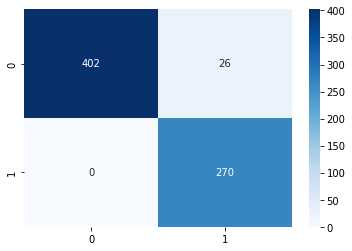

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
x_test_cau = x_whole_test_causian.drop(['two_year_recid'], axis = 1)
y_test_cau = x_whole_test_causian.two_year_recid
y_pred_cau = lr.predict(x_test_cau)
print(y_test_cau.shape, "udaa")
print(y_pred_cau.shape, "kumarr")
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test_cau.T, y_pred_cau))
# ``print("Test Accuracy {:.2f}%".format(lr.score(y_test_afr.reshape(-1, 1),y_pred_af.reshape(-1, 1))*100))
tn, fp, fn, tp = confusion_matrix(y_test_cau,y_pred_cau).ravel()
print(confusion_matrix(y_test_cau,y_pred_cau))
sns.heatmap(confusion_matrix(y_test_cau,y_pred_cau),annot=True, cmap="Blues",fmt='d')
print("no of test",x_test_cau.shape)
(tn, fp, fn, tp )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test Accuracy 68.78%
[[1096   18]
 [ 618  305]]
no of test (23, 2037)


(1096, 18, 618, 305)

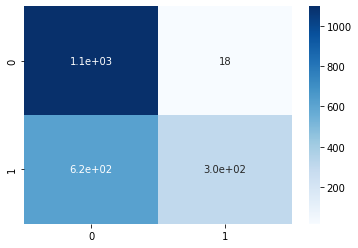

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
lr = RandomForestClassifier()

lr.fit(x_train.T,y_train.T)
y_pred = lr.predict(x_test.T)

print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))
tn, fp, fn, tp = confusion_matrix(x_whole_test['two_year_recid'].T,y_pred).ravel()
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap="Blues")
print("no of test",x_test.shape)
(tn, fp, fn, tp )

(1051,) udaa
(1051,) kumarr
Accuracy of african: 0.6631779257849667
[[489  16]
 [338 208]]
no of test (1051, 23)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(489, 16, 338, 208)

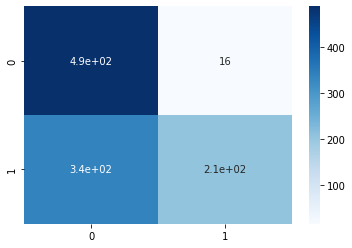

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
x_test_afr = x_whole_test_afr.drop(['two_year_recid'], axis = 1)
y_test_afr = x_whole_test_afr.two_year_recid
y_pred_af = lr.predict(x_test_afr)
print(y_test_afr.shape, "udaa")
print(y_pred_af.shape, "kumarr")
from sklearn.metrics import accuracy_score
print("Accuracy of african:",accuracy_score(y_test_afr.T, y_pred_af))
# print("Test Accuracy {:.2f}%".format(lr.score(y_test_afr.reshape(-1, 1),y_pred_af.reshape(-1, 1))*100))
tn, fp, fn, tp = confusion_matrix(y_test_afr,y_pred_af).ravel()
print(confusion_matrix(y_test_afr,y_pred_af))
sns.heatmap(confusion_matrix(y_test_afr,y_pred_af),annot=True, cmap="Blues")
print("no of test",x_test_afr.shape)
(tn, fp, fn, tp )

(698,) udaa
(698,) kumarr
Accuracy: 0.6776504297994269
[[427   1]
 [224  46]]
no of test (698, 23)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(427, 1, 224, 46)

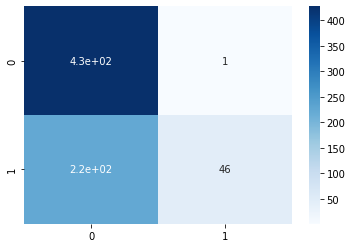

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
x_test_cau = x_whole_test_causian.drop(['two_year_recid'], axis = 1)
y_test_cau = x_whole_test_causian.two_year_recid
y_pred_cau = lr.predict(x_test_cau)
print(y_test_cau.shape, "udaa")
print(y_pred_cau.shape, "kumarr")
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test_cau.T, y_pred_cau))
# ``print("Test Accuracy {:.2f}%".format(lr.score(y_test_afr.reshape(-1, 1),y_pred_af.reshape(-1, 1))*100))
tn, fp, fn, tp = confusion_matrix(y_test_cau,y_pred_cau).ravel()
print(confusion_matrix(y_test_cau,y_pred_cau))
sns.heatmap(confusion_matrix(y_test_cau,y_pred_cau),annot=True, cmap="Blues")
print("no of test",x_test_cau.shape)
( tn, fp, fn, tp )

In [ ]:
y_race= dfDummies_race.two_year_recid.values
x_data_raec = dfDummies_race.drop(['two_year_recid'], axis = 1)
x_data_raec["days_in_jail"] = (pd.to_datetime(x_data_raec.c_jail_out) - pd.to_datetime(x_data_raec.c_jail_in)).dt.days

In [ ]:
x_data_raec = x_data_raec.drop(['c_jail_out','c_jail_in'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_data_raec,y_race,test_size = 0.33)
#transpose matrices
x_train_r = x_train_r.T
y_train_r = y_train_r.T
x_test_r = x_test_r.T
y_test_r = y_test_r.T

print(x_train_r)
print(x_test_r)

                         4112  5822  2136  6432  1041  876   6415  6077  2291  \
age                      28.0  46.0  37.0  32.0  37.0  22.0  63.0  29.0  36.0   
priors_count              0.0   0.0  26.0   8.0   0.0   1.0   2.0   0.0   2.0   
days_b_screening_arrest  -1.0   0.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -4.0   
decile_score              3.0   2.0  10.0   9.0   1.0   8.0   1.0   5.0   1.0   
is_recid                  0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   
score_text_high           0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
score_text_low            1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   
score_text_medium         0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
age_cat_25___45           1.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   
age_cat_greater_than_45   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
age_cat_less_than_25      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
sex_female                1.

Test Accuracy 96.91%
[[1058   63]
 [   0  916]]
no of test (17, 2037)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(1058, 63, 0, 916)

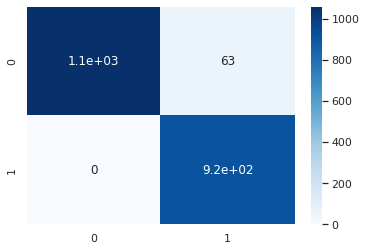

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_r = LogisticRegression()
lr_r.fit(x_train_r.T,y_train_r.T)
y_pred_r = lr_r.predict(x_test_r.T)

print("Test Accuracy {:.2f}%".format(lr_r.score(x_test_r.T,y_test_r.T)*100))
tn, fp, fn, tp = confusion_matrix(y_test_r,y_pred_r).ravel()
print(confusion_matrix(y_test_r,y_pred_r))
sns.heatmap(confusion_matrix(y_test_r,y_pred_r),annot=True, cmap="Blues")
print("no of test",x_test_r.shape)
(tn, fp, fn, tp )

In [ ]:
x_train = x_train.T

In [ ]:
x_test = x_test.T

In [ ]:
x_train_rr = x_train.drop(['race_caucasian','race_african_american','race_asian','race_hispanic','race_native_american','race_other'], axis = 1)
x_test_rr = x_test.drop(['race_caucasian','race_african_american','race_asian','race_hispanic','race_native_american','race_other'], axis = 1)


In [ ]:
x_train = x_train.T
x_test = x_test.T

print(x_train)
print(x_test)

                         1695  3621  775   2759  2543  718   5631  1826  2946  \
age                      36.0  37.0  41.0  38.0  41.0  34.0  30.0  67.0  26.0   
priors_count              0.0   0.0   8.0   0.0   0.0   0.0   0.0   2.0  10.0   
days_b_screening_arrest   0.0  -2.0 -29.0  -1.0   0.0   0.0  -1.0  -4.0   7.0   
decile_score              1.0   1.0   6.0   4.0   2.0   1.0   1.0   1.0   7.0   
is_recid                  0.0   1.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0   
score_text_high           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
score_text_low            1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   
score_text_medium         0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
age_cat_25___45           1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   1.0   
age_cat_greater_than_45   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
age_cat_less_than_25      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
sex_female                1.

Test Accuracy 96.96%
[[1049   62]
 [   0  926]]
no of test (2037, 17)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(1049, 62, 0, 926)

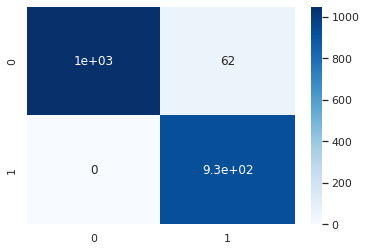

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_rr = LogisticRegression()
lr_rr.fit(x_train_rr,y_train.T)
y_pred_rr = lr_rr.predict(x_test_rr)

print("Test Accuracy {:.2f}%".format(lr_rr.score(x_test_rr,y_test.T)*100))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rr).ravel()
print(confusion_matrix(y_test,y_pred_rr))
sns.heatmap(confusion_matrix(y_test,y_pred_rr),annot=True, cmap="Blues")
print("no of test",x_test_rr.shape)
(tn, fp, fn, tp )